In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
Glass = pd.read_csv('glass.csv')
# view the data
Glass.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [59]:
Glass.isnull().sum().sort_values(ascending=False)/Glass.shape[0]

Id               0.0
RI               0.0
Na               0.0
Mg               0.0
Al               0.0
Si               0.0
K                0.0
Ca               0.0
Ba               0.0
Fe               0.0
Type of glass    0.0
dtype: float64

In [12]:
Glass.shape

(214, 11)

In [13]:
len(Glass)

214

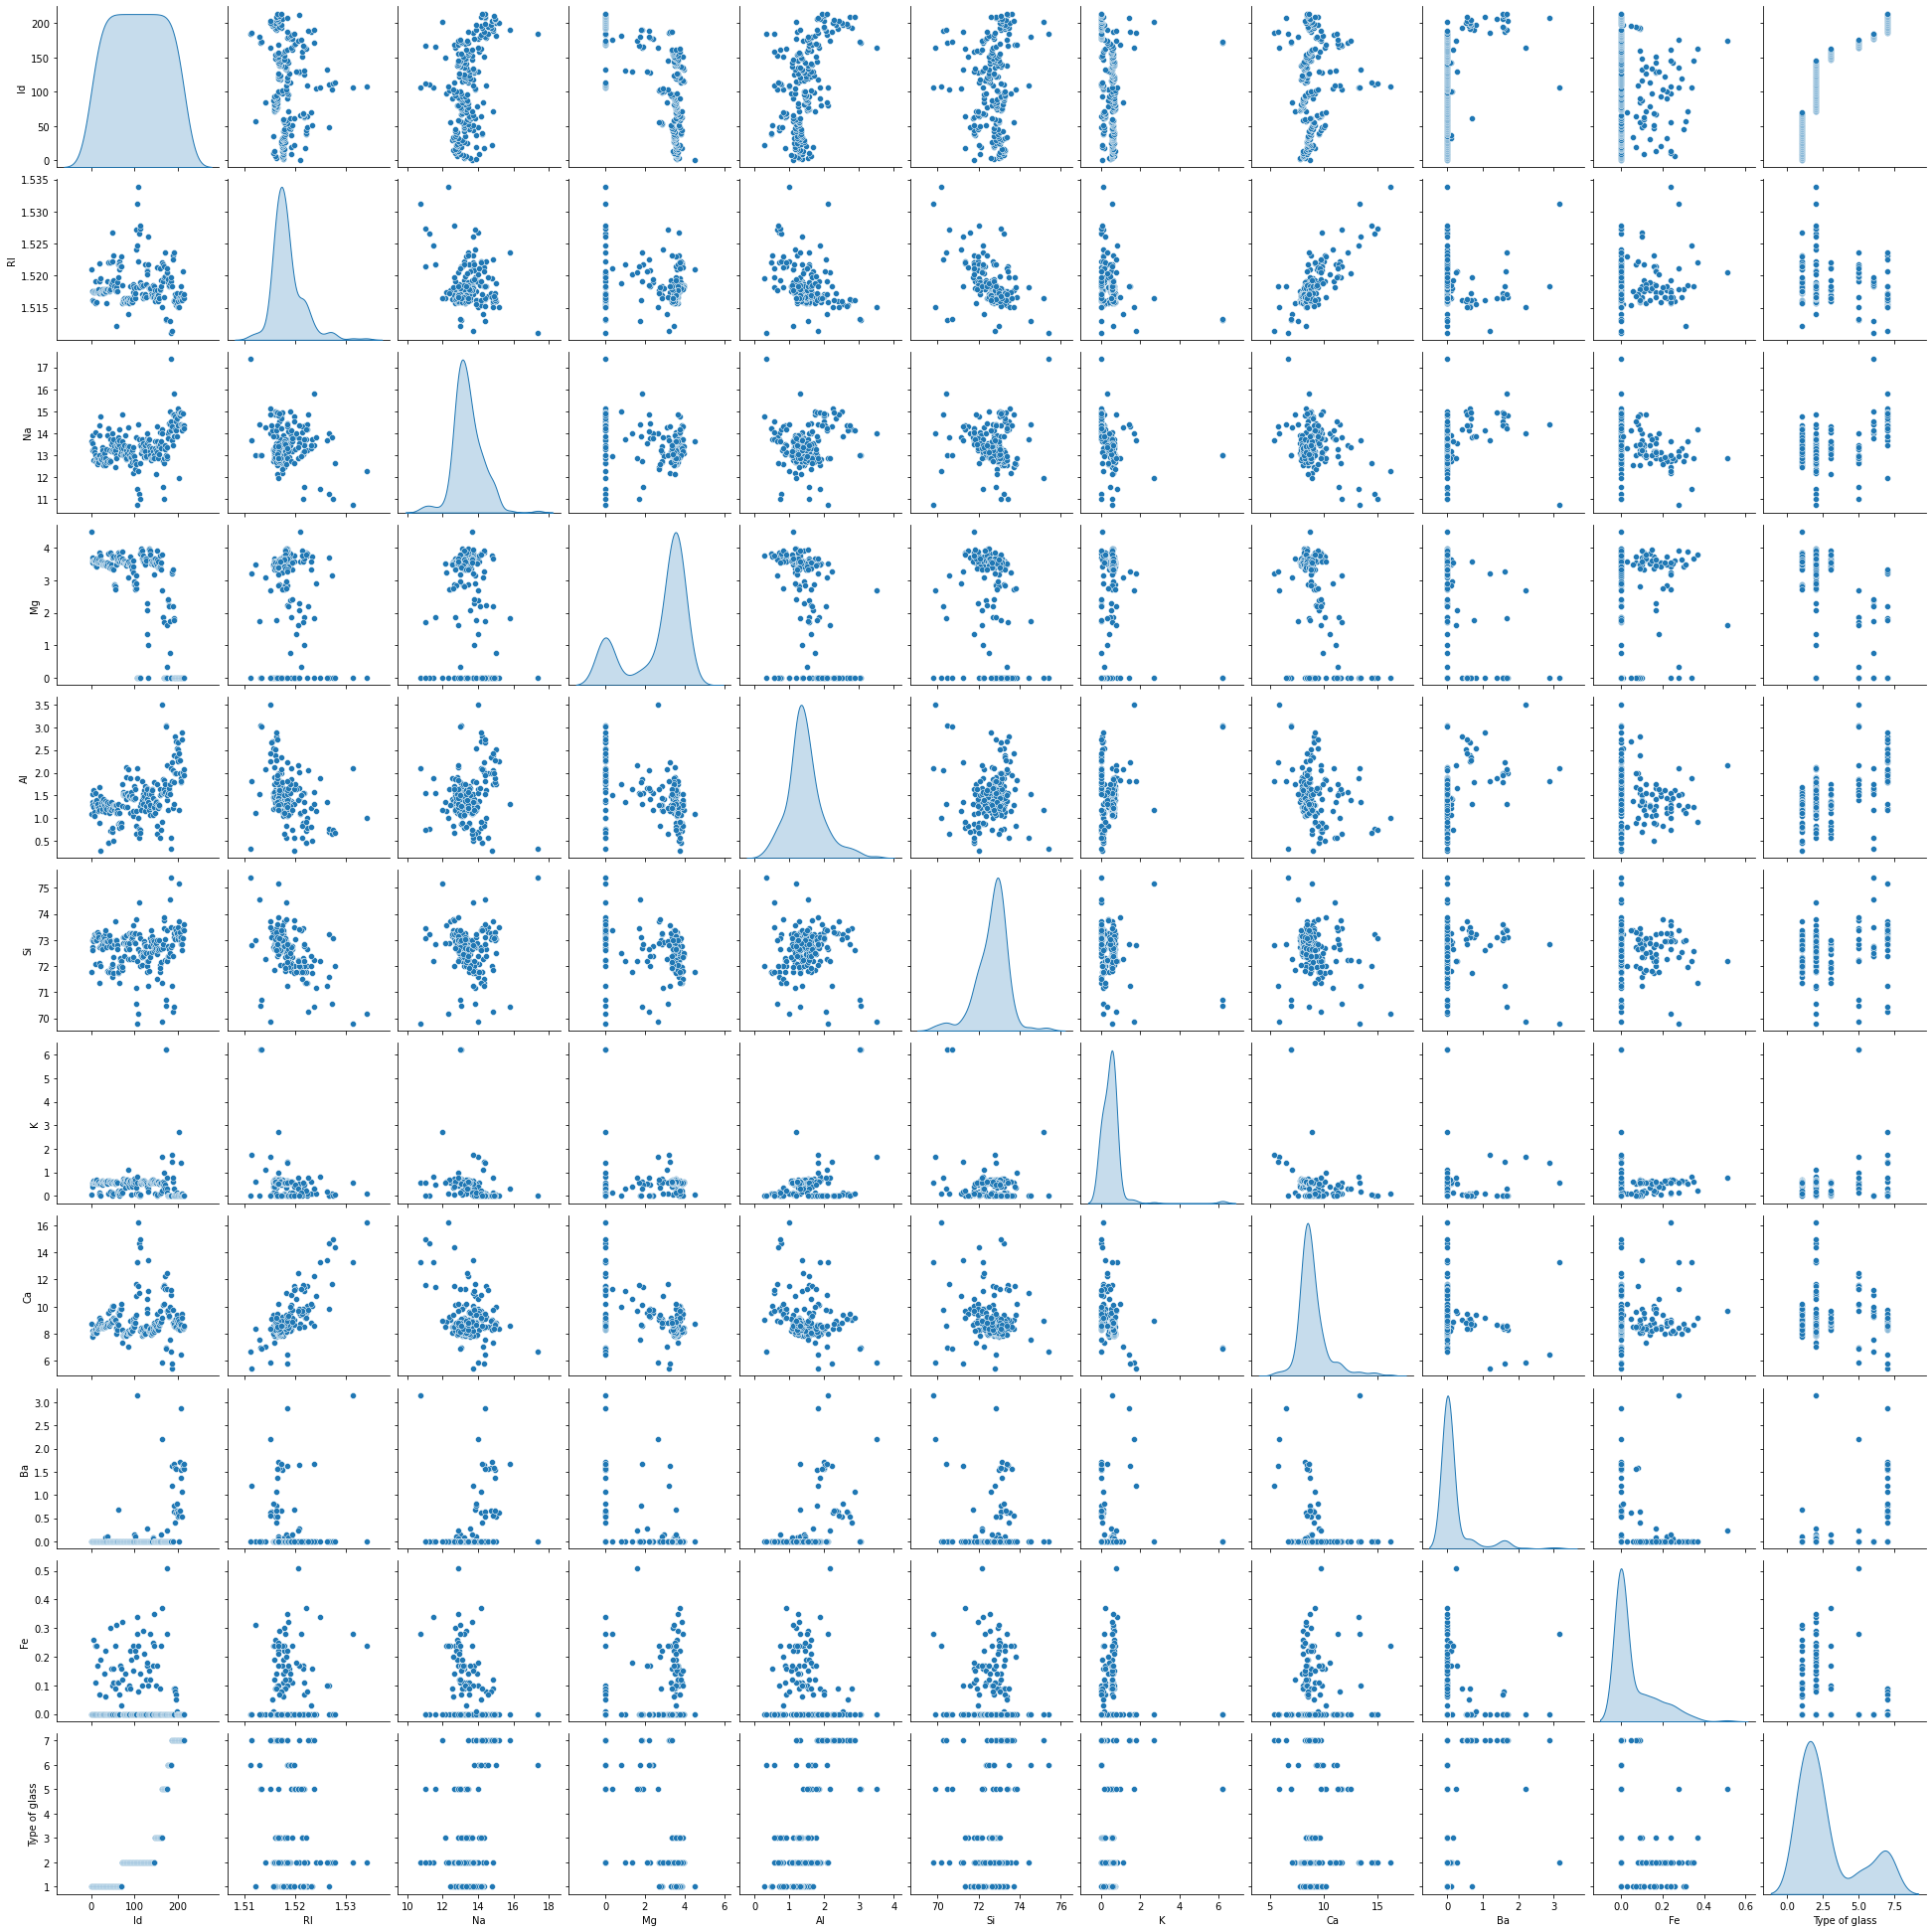

In [58]:
sns.pairplot(data=Glass, diag_kind='kde')

In [14]:
Glass.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [15]:
Glass['RI'].value_counts()

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64

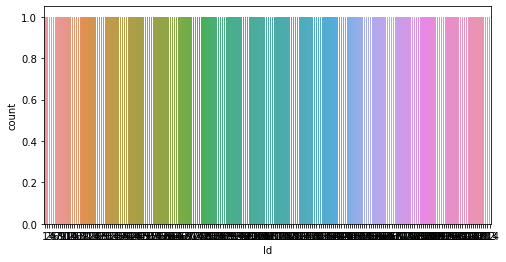

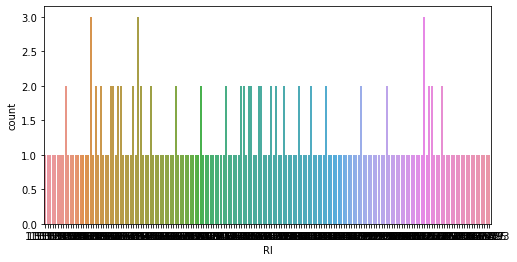

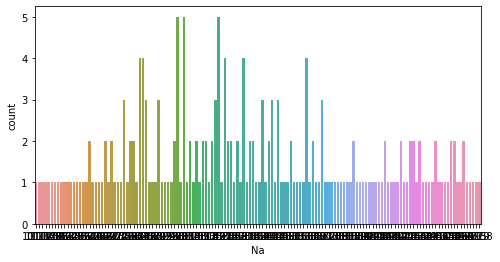

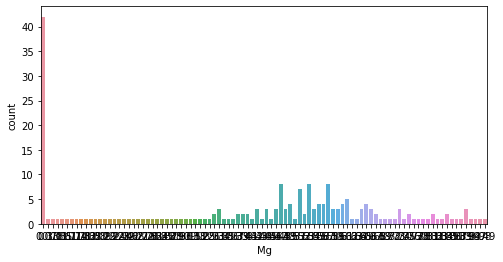

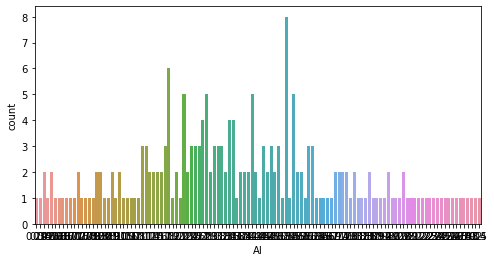

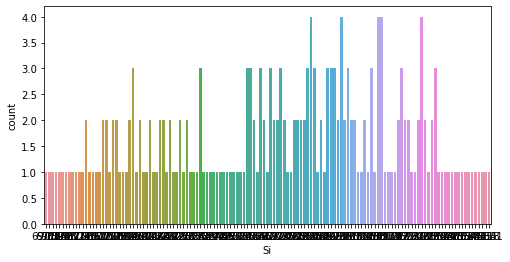

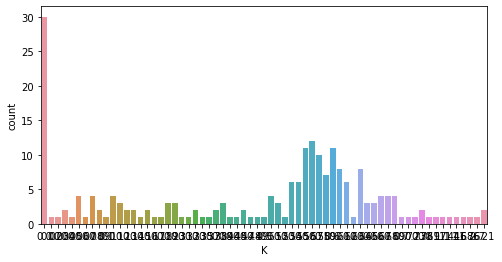

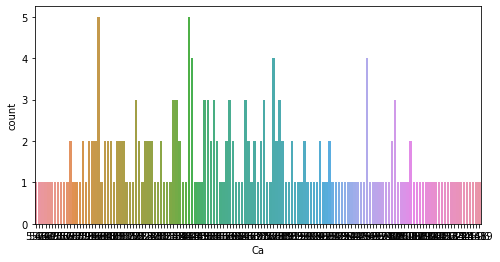

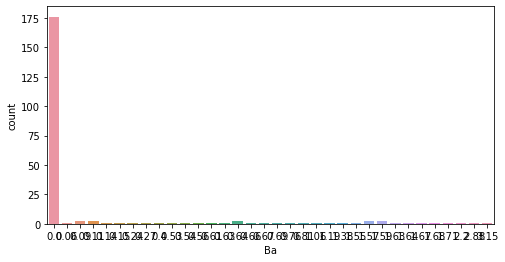

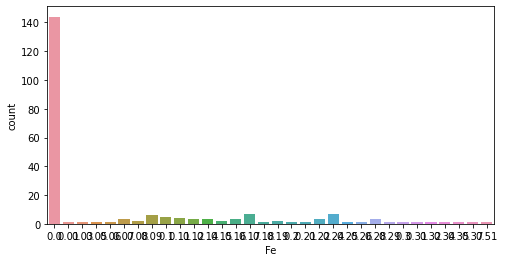

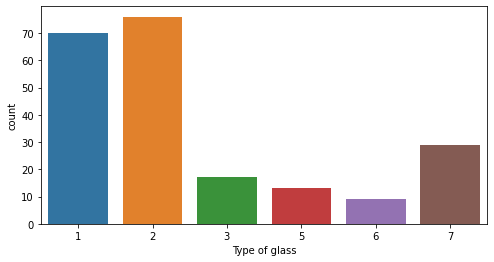

In [16]:
def _countplot(columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=Glass)
        plt.show()

_countplot(Glass.columns)

In [55]:
Glass.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

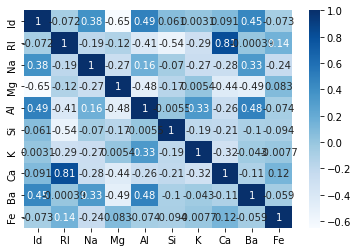

In [57]:
sns.heatmap(Glass[['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].corr(), cmap='Blues', annot=True)
plt.show()

In [19]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = Glass.drop("Type of glass", axis=1)
y = Glass["Type of glass"] 

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.9366227700218825

In [54]:
X.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 10), (43, 10), (171,), (43,))

In [27]:
X_test.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11
197,198,1.51727,14.70,0.00,2.34,73.28,0.00,8.95,0.66,0.00
66,67,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
191,192,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09
117,118,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00


In [24]:
y.tail()

209    7
210    7
211    7
212    7
213    7
Name: Type of glass, dtype: int64

In [25]:
# Make predictions
y_preds = model.predict(X_test)

In [26]:
y_preds[:10]

array([0.41533599, 6.76638201, 0.9117619 , 6.66817741, 2.88898779,
       1.94497661, 0.5490156 , 2.26068508, 1.93513487, 2.94416372])

In [31]:
y_test.mean()

3.302325581395349

In [32]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [33]:
y_test_mean[:10]

array([3.30232558, 3.30232558, 3.30232558, 3.30232558, 3.30232558,
       3.30232558, 3.30232558, 3.30232558, 3.30232558, 3.30232558])

In [34]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [35]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

In [38]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.44486959715325164

In [37]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.3317278700531208

In [40]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

-25.311310483194344

In [41]:
cv_r2

array([-74.17762531,   0.        ,  -1.75630614])

In [42]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-1.7582333747341672

In [43]:
cv_mse

array([-1.21455044, -0.13492133, -0.63023252, -0.97175498, -5.83970761])

In [44]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-1.036551801163578

In [45]:
cv_mae

array([-1.05583715, -0.27330732, -0.63772125, -0.87240726, -2.34348602])

In [47]:
# Evaluate model using evaluation functions
print("Ridge metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Ridge metrics on the test set
R2 score: 0.9366227700218825
MAE: 0.44486959715325164
MSE: 0.3317278700531208


In [61]:
print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.2f}%")

Model accuracy on test set: 93.66%


In [62]:
import pickle

# Save an extisting model to file
pickle.dump(model, open("gs_random_random_forest_model_1.pkl", "wb"))

In [63]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))